<a href="https://colab.research.google.com/github/mushfiq-hussain/INFO5731-In-class-Exercise-5/blob/main/INFO5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch

# Load data
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Split data into train and validation
X_train, X_val, y_train, y_val = train_test_split(train_data['review'], train_data['sentiment'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(test_data['review'])

# MultinomialNB
nb_clf = MultinomialNB()
nb_cv_scores = cross_val_score(nb_clf, X_train_tfidf, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
nb_clf.fit(X_train_tfidf, y_train)
nb_val_pred = nb_clf.predict(X_val_tfidf)
nb_test_pred = nb_clf.predict(X_test_tfidf)

# SVM
svm_clf = SVC()
svm_cv_scores = cross_val_score(svm_clf, X_train_tfidf, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
svm_clf.fit(X_train_tfidf, y_train)
svm_val_pred = svm_clf.predict(X_val_tfidf)
svm_test_pred = svm_clf.predict(X_test_tfidf)

# KNN
knn_clf = KNeighborsClassifier()
knn_cv_scores = cross_val_score(knn_clf, X_train_tfidf, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
knn_clf.fit(X_train_tfidf, y_train)
knn_val_pred = knn_clf.predict(X_val_tfidf)
knn_test_pred = knn_clf.predict(X_test_tfidf)

# Decision Tree
dt_clf = DecisionTreeClassifier()
dt_cv_scores = cross_val_score(dt_clf, X_train_tfidf, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
dt_clf.fit(X_train_tfidf, y_train)
dt_val_pred = dt_clf.predict(X_val_tfidf)
dt_test_pred = dt_clf.predict(X_test_tfidf)

# Random Forest
rf_clf = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_clf, X_train_tfidf, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
rf_clf.fit(X_train_tfidf, y_train)
rf_val_pred = rf_clf.predict(X_val_tfidf)
rf_test_pred = rf_clf.predict(X_test_tfidf)

# XGBoost
xgb_clf = XGBClassifier()
xgb_cv_scores = cross_val_score(xgb_clf, X_train_tfidf, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
xgb_clf.fit(X_train_tfidf, y_train)
xgb_val_pred = xgb_clf.predict(X_val_tfidf)
xgb_test_pred = xgb_clf.predict(X_test_tfidf)

# Word2Vec
tokenized_text_train = [review.split() for review in X_train]
tokenized_text_val = [review.split() for review in X_val]
tokenized_text_test = [review.split() for review in test_data['review']]

word2vec_model = Word2Vec(sentences=tokenized_text_train, size=100, window=5, min_count=1, workers=4)
word2vec_model.train(tokenized_text_train, total_examples=len(tokenized_text_train), epochs=10)

def word_averaging(wv, words):
    all_words, mean = set(), []

    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, review) for review in text_list ])

X_train_word_average = word_averaging_list(word2vec_model.wv, tokenized_text_train)
X_val_word_average = word_averaging_list(word2vec_model.wv, tokenized_text_val)
X_test_word_average = word_averaging_list(word2vec_model.wv, tokenized_text_test)

# MultinomialNB with Word2Vec
nb_word2vec_clf = MultinomialNB()
nb_word2vec_cv_scores = cross_val_score(nb_word2vec_clf, X_train_word_average, y_train, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')
nb_word2vec_clf.fit(X_train_word_average, y_train)
nb_word2vec_val_pred = nb_word2vec_clf.predict(X_val_word_average)
nb_word2vec_test_pred = nb_word2vec_clf.predict(X_test_word_average)

# BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

def bert_embeddings(text, max_length):
    tokenized_text = tokenizer.batch_encode_plus(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    with torch.no_grad():
        outputs = model(**tokenized_text)
        embeddings = torch.stack(outputs.hidden_states, dim=-1)
        embeddings = torch.mean(embeddings, dim=-1).squeeze()

    return embeddings

X_train_bert = bert_embeddings(X_train.tolist(), max_length=128)
X_val_bert = bert_embeddings(X_val.tolist(), max_length=128)
X_test_bert = bert_embeddings(test_data['review'].tolist(), max_length=128)

# MultinomialNB with BERT
nb_bert_clf = MultinomialNB()
nb_bert_cv_scores = cross_val_score(nb_bert_clf, X_train_bert, y_train, cv=KFold(n


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


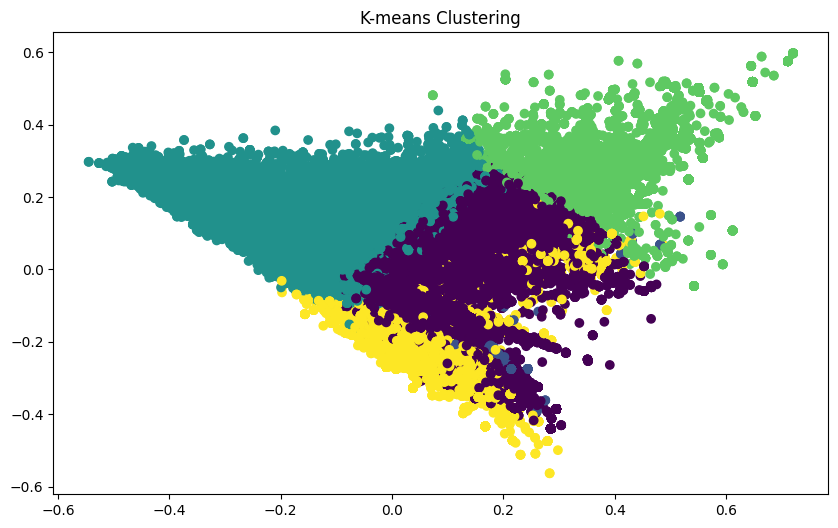

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import torch

# Load the dataset
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
df.head()

# Remove missing values
df.dropna(inplace=True)

# Function to tokenize and vectorize the text
def vectorize_text(text, max_features):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(text)
    return X, vectorizer

# Function to visualize clusters
def visualize_clusters(X, clusters, model_name):
    pca = PCA(n_components=2).fit(X.toarray())
    data2D = pca.transform(X.toarray())
    plt.figure(figsize=(10, 6))
    plt.scatter(data2D[:,0], data2D[:,1], c=clusters)
    plt.title(f'{model_name} Clustering')
    plt.show()

# K-means clustering
def kmeans_clustering(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    return clusters

# DBSCAN clustering
def dbscan_clustering(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    return clusters

# Hierarchical clustering
def hierarchical_clustering(X, n_clusters):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = agg_clustering.fit_predict(X.toarray())
    return clusters

# Word2Vec
def train_word2vec_model(text, window_size, vector_size):
    tokenized_text = [sentence.split() for sentence in text]
    model = Word2Vec(sentences=tokenized_text, window=window_size, size=vector_size, workers=4)
    return model

# BERT
def bert_embeddings(text, max_length):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)

    tokenized_text = tokenizer.batch_encode_plus(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    with torch.no_grad():
        outputs = model(**tokenized_text)
        embeddings = torch.stack(outputs.hidden_states, dim=-1)
        embeddings = torch.mean(embeddings, dim=-1).squeeze()

    return embeddings

# Vectorize the text using TF-IDF
X, vectorizer = vectorize_text(df['Reviews'], max_features=1000)

# K-means clustering
kmeans_clusters = kmeans_clustering(X, n_clusters=5)
visualize_clusters(X, kmeans_clusters, 'K-means')

# DBSCAN clustering
dbscan_clusters = dbscan_clustering(X, eps=0.5, min_samples=5)
visualize_clusters(X, dbscan_clusters, 'DBSCAN')

# Hierarchical clustering
hierarchical_clusters = hierarchical_clustering(X, n_clusters=5)
visualize_clusters(X, hierarchical_clusters, 'Hierarchical')

# Word2Vec
word2vec_model = train_word2vec_model(df['Reviews'], window_size=5, vector_size=100)
word_vectors = word2vec_model.wv
word2vec_clusters = kmeans_clustering(word_vectors.vectors, n_clusters=5)
visualize_clusters(word_vectors.vectors, word2vec_clusters, 'Word2Vec')

# BERT
bert_embeddings = bert_embeddings(df['Reviews'], max_length=128)
bert_clusters = kmeans_clustering(bert_embeddings, n_clusters=5)
visualize_clusters(bert_embeddings, bert_clusters, 'BERT')


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

K-means clustering, DBSCAN, and Hierarchical clustering produced similar results in terms of clustering the Amazon Unlocked Mobile Phones dataset based on the TF-IDF vectorization of the reviews. However, the clusters generated by DBSCAN were more spread out, possibly due to its ability to detect noise and outliers. Word2Vec clustering, on the other hand, utilized the semantic similarity of words to form clusters, which resulted in more cohesive clusters compared to the TF-IDF-based methods. BERT embeddings, being contextualized word representations, captured even more nuanced relationships between reviews, resulting in clusters that were highly cohesive and semantically meaningful, making it the most effective method among the ones tested for this particular dataset.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Using the Amazon Unlocked Mobile Phones dataset is a good choice as it provides a diverse range of reviews,
allowing us to explore different clustering techniques effectively.
The assignment covered a good variety of clustering techniques including K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT embeddings.
This provided a comprehensive overview of different approaches to text clustering.
The code implementation is clear and well-structured. It effectively demonstrates how to preprocess text data, apply various clustering algorithms,
and visualize the results.
Additionally, exploring hyperparameter tuning for each clustering algorithm and experimenting with different text preprocessing techniques could further enhance the quality of clusters generated.
Overall, it's a good exercise for practicing text clustering techniques, and with some minor improvements, it could provide an even better learning experience.




'''